# Agricultural Exports Categories Analysis
*by Sergio Postigo and Víctor Diví*

## 6. Model Building

In this section we will create predictive models using different approaches

In [22]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm import tqdm

train = pd.read_csv('../data/preprocessed_data/train_data.csv')
test = pd.read_csv('../data/preprocessed_data/test_data.csv')

comercial_description_model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
custom_description_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')

### 6.1. Dataframe building

First, let's create the train and test dataframes.
We start by computing the numerical representation of the text fields (namely *Descripcion Comercial* and *Descripcion de la Partida Aduanera*) using the previously created models

In [23]:
train_comercial = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                   tqdm(train['Descripcion Comercial'].values)]
train_customs = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                 tqdm(train['Descripcion de la Partida Aduanera'].values)]

In [24]:
comercial_columns = [f'Descripcion Comercial {i}' for i in range(len(train_comercial[0]))]
customs_columns = [f'Descripcion de la Partida Aduanera {i}' for i in range(len(train_comercial[0]))]

In [25]:
train_comercial_df = pd.DataFrame(train_comercial, columns=comercial_columns)
train_customs_df = pd.DataFrame(train_customs, columns=customs_columns)
train_df = pd.concat([train, train_comercial_df, train_customs_df], axis=1)
train_df.head()

 86%|████████▌ | 44445/51885 [08:43<01:27, 84.83it/s] 


,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,Descripcion de la Partida Aduanera 0,Descripcion de la Partida Aduanera 1,Descripcion de la Partida Aduanera 2,Descripcion de la Partida Aduanera 3,Descripcion de la Partida Aduanera 4,Descripcion de la Partida Aduanera 5,Descripcion de la Partida Aduanera 6,Descripcion de la Partida Aduanera 7,Descripcion de la Partida Aduanera 8,Descripcion de la Partida Aduanera 9
0,4,arabia saudita,granadas frescas cajas variead wonderful acoge...,demas frutas frutos frescos,0.549177,Granada,-0.070180,0.053110,0.024851,0.123643,...,-0.011278,0.050033,0.061320,0.065707,0.046386,0.032851,0.191353,0.066158,-0.145712,0.048252
1,5,canada,quinua blanca sacos consumo humano acoge resti...,demas alforfon mijo alpiste demas cereales,0.486531,Quinua,-0.046737,0.070781,-0.075696,0.126880,...,-0.096054,0.088583,0.082657,0.150616,0.021914,0.008313,0.321723,0.076018,-0.213604,-0.087178
2,10,reino unido,esparragos frescos uso consumo humano acoge re...,esparragos frescos refrigerados,0.229562,Espárrago,-0.074277,0.231315,0.026924,-0.037737,...,-0.033999,0.034506,0.004657,0.229038,0.000164,0.113933,0.329466,0.098232,-0.206676,-0.012159
3,8,estados unidos,mandarinas frescas cajas variedad tango acoge ...,demas clementinas,0.833333,Mandarina,-0.077141,0.087996,0.016106,0.064421,...,-0.087486,0.106520,0.003196,0.212308,0.065145,0.125382,0.290621,0.119326,-0.189266,0.003429
4,6,japon,arveja fresca dulce cajas acoge drawback,arvejas guisantes chicharos pisum sativum fres...,0.225000,Arveja,0.104522,0.047905,-0.003892,0.053461,...,-0.029680,0.020980,0.015901,0.090492,0.040669,0.054450,0.159695,0.096420,-0.058884,-0.051002


In [26]:
test_comercial = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                  tqdm(test['Descripcion Comercial'].values)]
test_customs = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                tqdm(test['Descripcion de la Partida Aduanera'].values)]





























































































































































































































































































































































































































































































































































































































































100%|██████████| 51885/51885 [00:50<00:00, 1025.76it/s]






















































































































































































































































































































In [27]:
test_comercial_df = pd.DataFrame(test_comercial, columns=comercial_columns)
test_customs_df = pd.DataFrame(test_customs, columns=customs_columns)
test_df = pd.concat([test, test_comercial_df, test_customs_df], axis=1)
test_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,Descripcion de la Partida Aduanera 0,Descripcion de la Partida Aduanera 1,Descripcion de la Partida Aduanera 2,Descripcion de la Partida Aduanera 3,Descripcion de la Partida Aduanera 4,Descripcion de la Partida Aduanera 5,Descripcion de la Partida Aduanera 6,Descripcion de la Partida Aduanera 7,Descripcion de la Partida Aduanera 8,Descripcion de la Partida Aduanera 9
0,7,rumania,quinua blanca convencional presentado per bag ...,demas alforfon mijo alpiste demas cereales,0.684932,Quinua,-0.144448,0.136159,0.052658,0.107374,...,-0.108962,0.118656,0.105807,0.196410,0.040301,0.130893,0.399169,0.056954,-0.213505,-0.095813
1,7,china,arandanos frescos cajas cold treatment acoge d...,arandanos murtones demas frutos genero vaccini...,0.150000,Arándano,-0.001809,0.134818,0.002078,0.036655,...,-0.138000,0.113411,-0.006631,0.125224,0.016313,0.192482,0.258297,0.025606,-0.122048,0.007698
2,10,chile,zapallo fresco lotes agranel producto agricola...,calabazas zapallos calabacines cucurbita spp,10.000000,Zapallo,-0.153372,-0.014667,-0.074857,0.003525,...,-0.104037,0.067860,0.055283,0.096455,0.116088,-0.005744,0.139290,0.088792,-0.105125,0.055936
3,12,mexico,pimiento paprika entero seco codigo restitucio...,demas pimienta genero piper frutos generos cap...,0.280171,Paprika,-0.019364,0.076402,-0.022262,0.058218,...,-0.166361,0.077862,0.104227,0.312149,0.039278,0.200573,0.369915,0.267389,-0.071434,-0.080380
4,9,paises bajos,ramos flores frescas wax flower white grado we...,demas flores capullos cortados ramos adornos f...,0.306558,Flores,-0.043992,0.230066,-0.021241,0.211347,...,-0.115550,-0.070720,0.077556,-0.028427,-0.061582,-0.005439,0.162323,0.212636,0.029566,-0.065415


Then, we codify categorical fields (namely *Fecha* and *Pais de Destino*) into a set of binary fields
Note that for *Pais de Destino*, there's the possibility that during the down-sampling of the data some country were lost. If that were the case, we would need to go to the raw data to build the sets.

In [28]:
from sklearn.preprocessing import OneHotEncoder
import unidecode

all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()
all_countries = [unidecode.unidecode(country.lower()) for country in all_countries]

C:\Users\spost\AppData\Local\Temp\ipykernel_7180\3583162447.py:4: DtypeWarning: Columns (6,14,16,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()


In [29]:
country_encoder = OneHotEncoder(categories=[all_countries])

train_countries = country_encoder.fit_transform(train_df['Pais de Destino'].values.reshape(-1, 1))
test_countries = country_encoder.fit_transform(test_df['Pais de Destino'].values.reshape(-1, 1))

In [30]:
train_countries_df = pd.DataFrame.sparse.from_spmatrix(train_countries, columns=all_countries)
test_countries_df = pd.DataFrame.sparse.from_spmatrix(test_countries, columns=all_countries)

train_countries_df.head()

,chile,australia,jordania,brasil,estados unidos,espana,suiza,italia,aruba,paises bajos,...,gabon,togo,mozambique,nueva caledonia,benin,bahamas,zambia,cabo verde,barbados,serbia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
month_encoder = OneHotEncoder()

train_months = month_encoder.fit_transform(train_df['Fecha'].values.reshape(-1, 1))
test_months = month_encoder.fit_transform(test_df['Fecha'].values.reshape(-1, 1))

In [32]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
          'December']
train_months_df = pd.DataFrame.sparse.from_spmatrix(train_months, columns=months)
test_months_df = pd.DataFrame.sparse.from_spmatrix(test_months, columns=months)

train_months_df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
train_df = pd.concat([train_df, train_countries_df, train_months_df], axis=1)
test_df = pd.concat([test_df, test_countries_df, test_months_df], axis=1)

train_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,March,April,May,June,July,August,September,October,November,December
0,4,arabia saudita,granadas frescas cajas variead wonderful acoge...,demas frutas frutos frescos,0.549177,Granada,-0.070180,0.053110,0.024851,0.123643,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,canada,quinua blanca sacos consumo humano acoge resti...,demas alforfon mijo alpiste demas cereales,0.486531,Quinua,-0.046737,0.070781,-0.075696,0.126880,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,reino unido,esparragos frescos uso consumo humano acoge re...,esparragos frescos refrigerados,0.229562,Espárrago,-0.074277,0.231315,0.026924,-0.037737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8,estados unidos,mandarinas frescas cajas variedad tango acoge ...,demas clementinas,0.833333,Mandarina,-0.077141,0.087996,0.016106,0.064421,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,japon,arveja fresca dulce cajas acoge drawback,arvejas guisantes chicharos pisum sativum fres...,0.225000,Arveja,0.104522,0.047905,-0.003892,0.053461,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
usd_kg = ['usd_kg']
train_usd_kg = train['usd_kg'].tolist()
test_usd_kg = test['usd_kg'].tolist()

### 6.2. Multi-Layer Perceptron

#### 6.2.1. Using only text colums

##### 6.2.1.1 Using *Descripcion Comercial* (comercial description)

In [35]:
from sklearn.neural_network import MLPClassifier

clf_comercial = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                              early_stopping=True, verbose=True)
clf_comercial.fit(train_df[comercial_columns].values, train_df['Categoría macro Aurum'].values)

Exception ignored in: <function tqdm.__del__ at 0x000002C7DC7C3BE0>
Traceback (most recent call last):
  File "c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000002C7DC7C3BE0>
Traceback (most recent call last):
  File "c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
 30%|██▉       | 62057/207540 [19:47<46:24, 52.25it/s] 


Iteration 1, loss = 2.88063910
Validation score: 0.171485
Iteration 2, loss = 2.62639455
Validation score: 0.260094
Iteration 3, loss = 2.43795044
Validation score: 0.319408
Iteration 4, loss = 2.32369044
Validation score: 0.340079
Iteration 5, loss = 2.28234187
Validation score: 0.346487
Iteration 6, loss = 2.25917320
Validation score: 0.352848
Iteration 7, loss = 2.24032009
Validation score: 0.356751
Iteration 8, loss = 2.22222810
Validation score: 0.361232
Iteration 9, loss = 2.20577195
Validation score: 0.368555
Iteration 10, loss = 2.19218662
Validation score: 0.372940
Iteration 11, loss = 2.18156209
Validation score: 0.373518
Iteration 12, loss = 2.17387766
Validation score: 0.375446
Iteration 13, loss = 2.16744683
Validation score: 0.377518
Iteration 14, loss = 2.16233952
Validation score: 0.377759
Iteration 15, loss = 2.15753870
Validation score: 0.380023
Iteration 16, loss = 2.15282469
Validation score: 0.382191
Iteration 17, loss = 2.14761160
Validation score: 0.381902
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [36]:
predictions = clf_comercial.predict(test_df[comercial_columns].values)

Get the % of accuracy

In [37]:
from sklearn.metrics import f1_score, accuracy_score

print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.403642671292281
F1-score: 0.18382992360951597


Create a confusion matrix

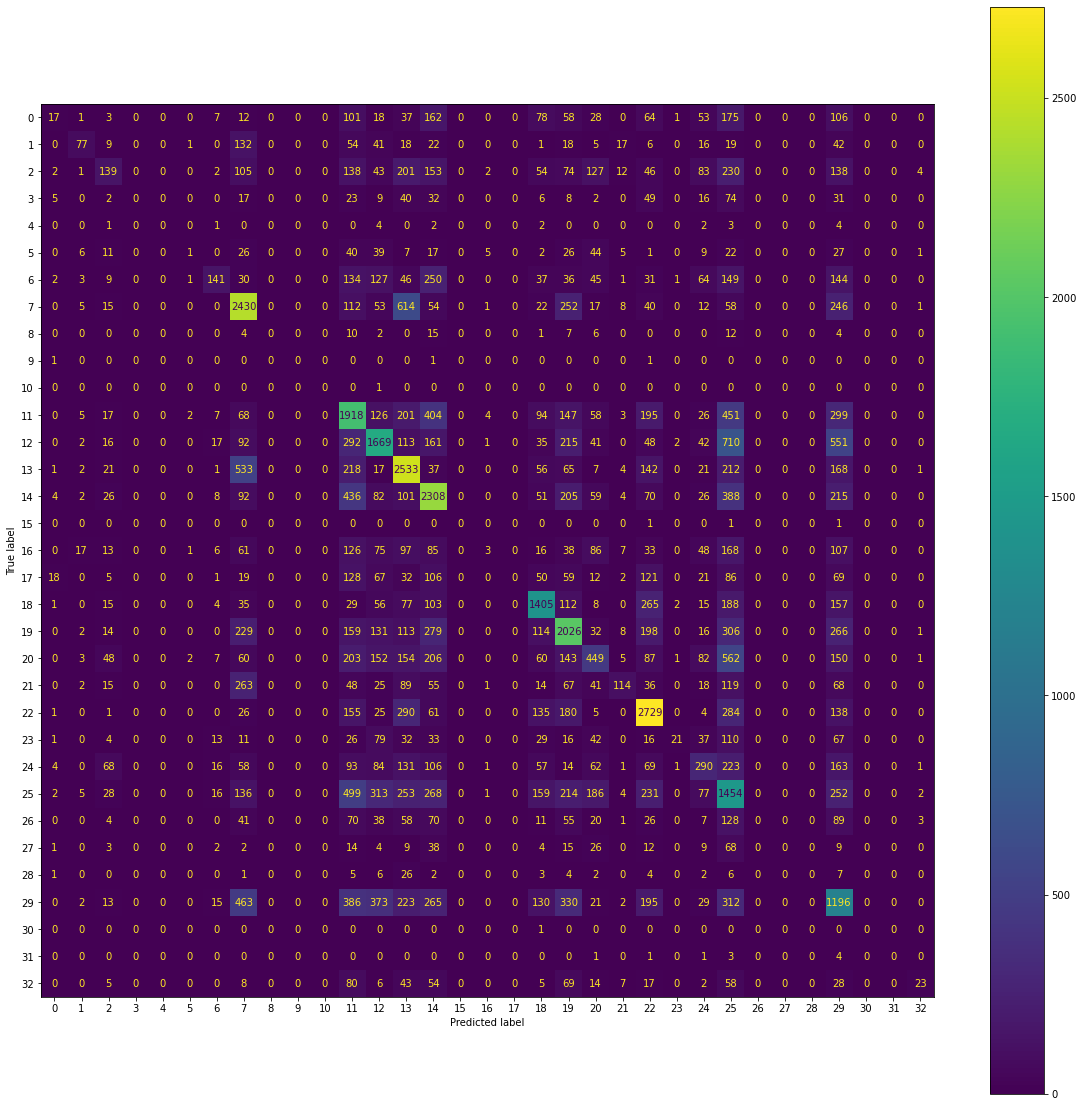

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### 6.2.1.2 Using *Descripcion de la Partida Aduanera* (customs description)

In [39]:
clf_customs = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                            early_stopping=True, verbose=True)
clf_customs.fit(train_df[customs_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.43470532
Validation score: 0.515804
Iteration 2, loss = 1.49179396
Validation score: 0.655584
Iteration 3, loss = 1.12544481
Validation score: 0.751132
Iteration 4, loss = 0.93551350
Validation score: 0.788475
Iteration 5, loss = 0.82430070
Validation score: 0.806977
Iteration 6, loss = 0.76329814
Validation score: 0.818926
Iteration 7, loss = 0.72231837
Validation score: 0.824419
Iteration 8, loss = 0.69058541
Validation score: 0.829720
Iteration 9, loss = 0.66607544
Validation score: 0.834008
Iteration 10, loss = 0.64598887
Validation score: 0.835309
Iteration 11, loss = 0.62958250
Validation score: 0.839645
Iteration 12, loss = 0.61502748
Validation score: 0.842103
Iteration 13, loss = 0.60265235
Validation score: 0.844078
Iteration 14, loss = 0.59133697
Validation score: 0.847837
Iteration 15, loss = 0.58090318
Validation score: 0.848993
Iteration 16, loss = 0.57148210
Validation score: 0.851932
Iteration 17, loss = 0.56279944
Validation score: 0.852992
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [40]:
predictions = clf_customs.predict(test_df[customs_columns].values)

Get the % of accuracy

In [41]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9062156692685748
F1-score: 0.6413085875416001


Create a confusion matrix


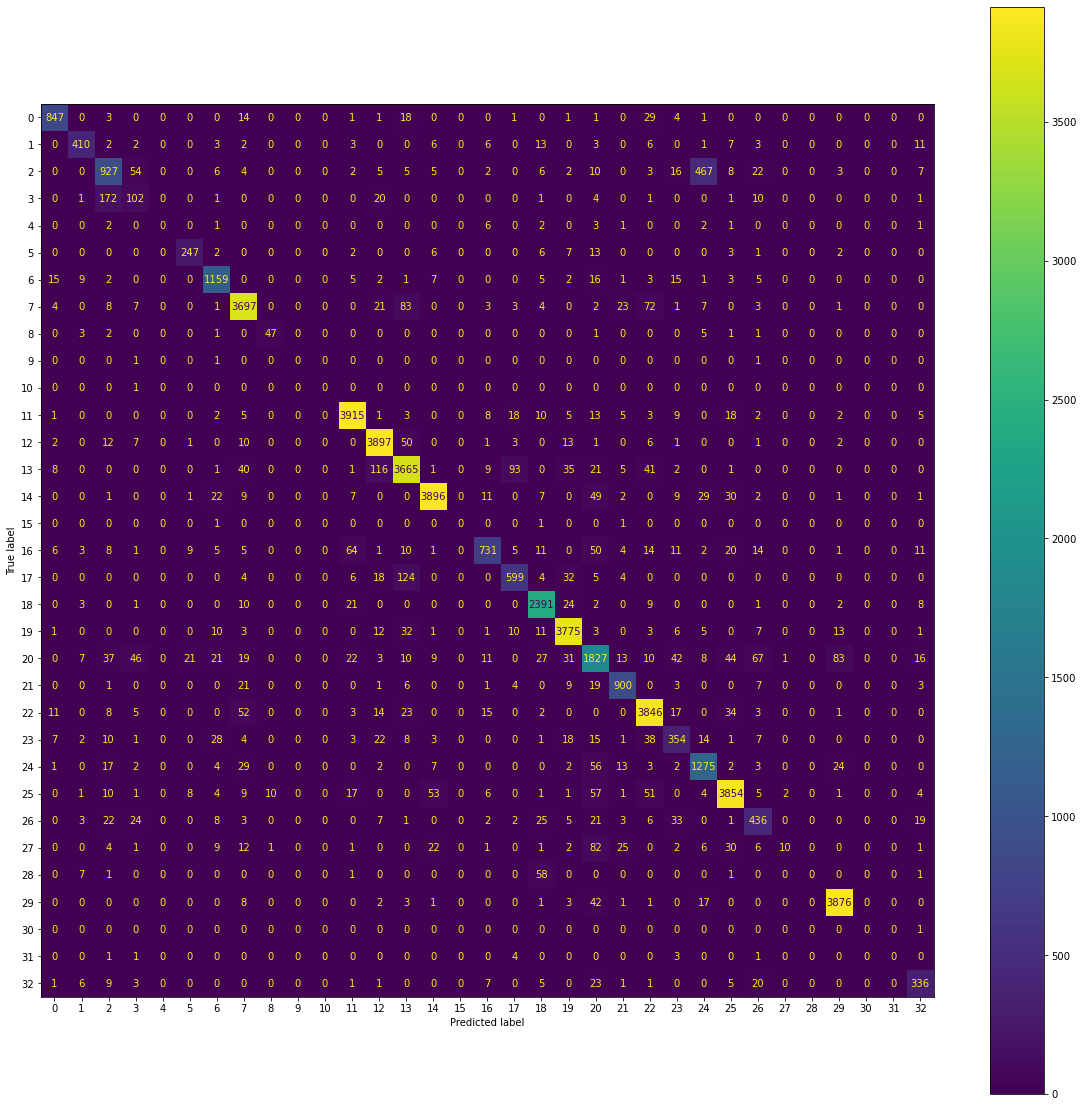

In [42]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### 6.2.1.3 Using *Descripcion Comercial* (comercial description) and *Descripcion de Partida Aduanera* (customs description)

In [43]:
clf_descriptions = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1,
                                 max_iter=1000,
                                 early_stopping=True, verbose=True)
clf_descriptions.fit(train_df[customs_columns + comercial_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.26624669
Validation score: 0.609087
Iteration 2, loss = 1.30457422
Validation score: 0.683290
Iteration 3, loss = 1.17371507
Validation score: 0.713694
Iteration 4, loss = 1.08983784
Validation score: 0.738701
Iteration 5, loss = 0.99999915
Validation score: 0.762793
Iteration 6, loss = 0.91771199
Validation score: 0.778934
Iteration 7, loss = 0.84164153
Validation score: 0.793823
Iteration 8, loss = 0.76688416
Validation score: 0.813482
Iteration 9, loss = 0.71205640
Validation score: 0.827359
Iteration 10, loss = 0.67990655
Validation score: 0.836658
Iteration 11, loss = 0.65969670
Validation score: 0.838730
Iteration 12, loss = 0.64576902
Validation score: 0.842633
Iteration 13, loss = 0.63456537
Validation score: 0.845379
Iteration 14, loss = 0.62507866
Validation score: 0.847258
Iteration 15, loss = 0.61624935
Validation score: 0.848752
Iteration 16, loss = 0.60769296
Validation score: 0.849668
Iteration 17, loss = 0.59912033
Validation score: 0.851402
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [44]:
predictions = clf_descriptions.predict(test_df[customs_columns + comercial_columns].values)

Get the % of accuracy

In [45]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9005300183097235
F1-score: 0.6217455216115387


Create a confusion matrix

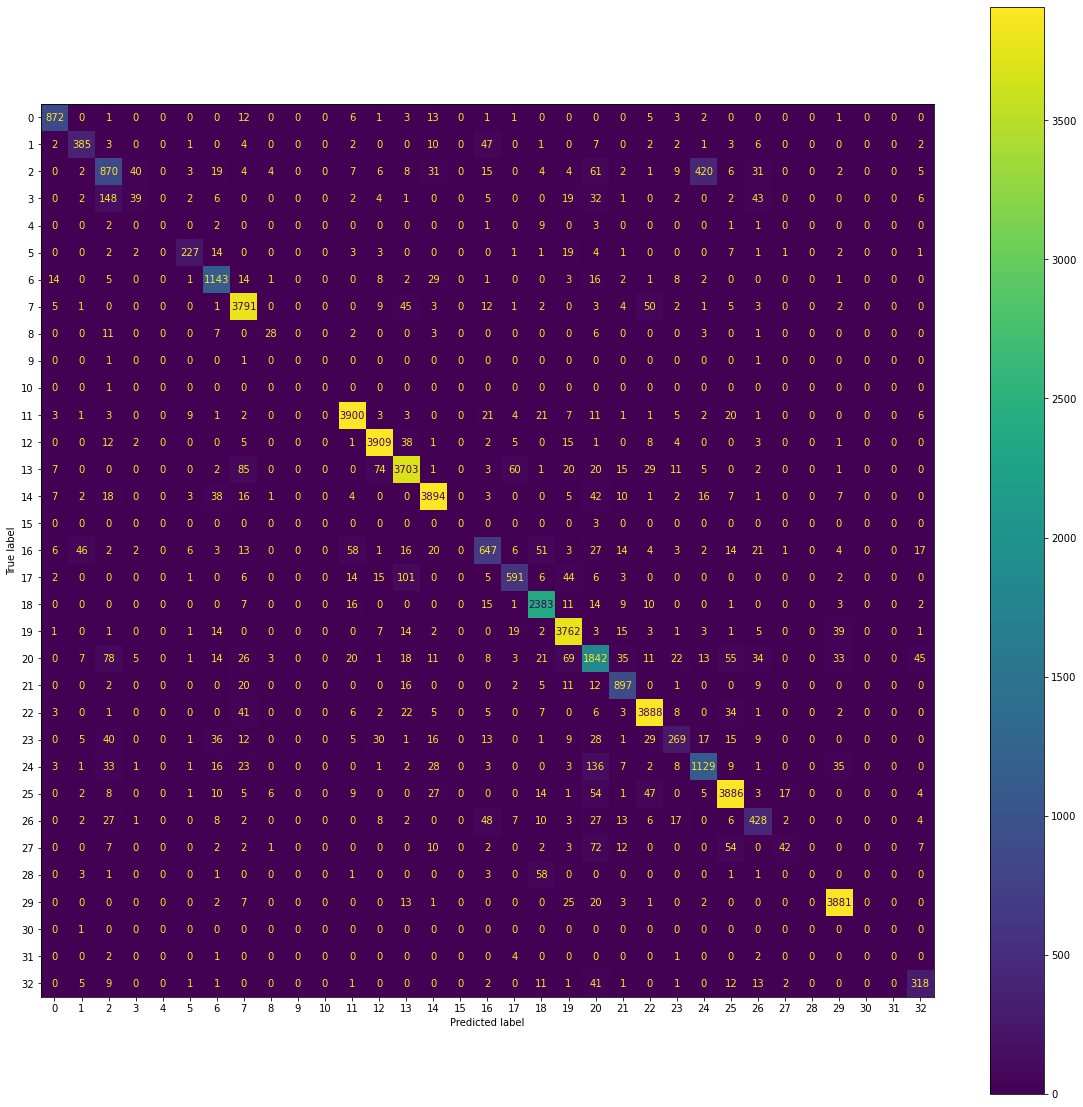

In [46]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.2.2. Using all data

In [47]:
clf_full = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                         early_stopping=True, verbose=True)
clf_full.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.64953592
Validation score: 0.471042
Iteration 2, loss = 1.52914418
Validation score: 0.680013
Iteration 3, loss = 1.08634104
Validation score: 0.740773
Iteration 4, loss = 0.90293803
Validation score: 0.768045
Iteration 5, loss = 0.80242773
Validation score: 0.790498
Iteration 6, loss = 0.73533194
Validation score: 0.807459
Iteration 7, loss = 0.69121060
Validation score: 0.820179
Iteration 8, loss = 0.65837463
Validation score: 0.831213
Iteration 9, loss = 0.63478817
Validation score: 0.834875
Iteration 10, loss = 0.62067853
Validation score: 0.838393
Iteration 11, loss = 0.60494893
Validation score: 0.839308
Iteration 12, loss = 0.59093025
Validation score: 0.843693
Iteration 13, loss = 0.57731226
Validation score: 0.847162
Iteration 14, loss = 0.57420852
Validation score: 0.848607
Iteration 15, loss = 0.55814346
Validation score: 0.852751
Iteration 16, loss = 0.54476934
Validation score: 0.854149
Iteration 17, loss = 0.54166123
Validation score: 0.854052
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

In [48]:
predictions = clf_full.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

Get the % of accuracy

In [49]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9113809386142431
F1-score: 0.6278897573847991


Create a confusion matrix

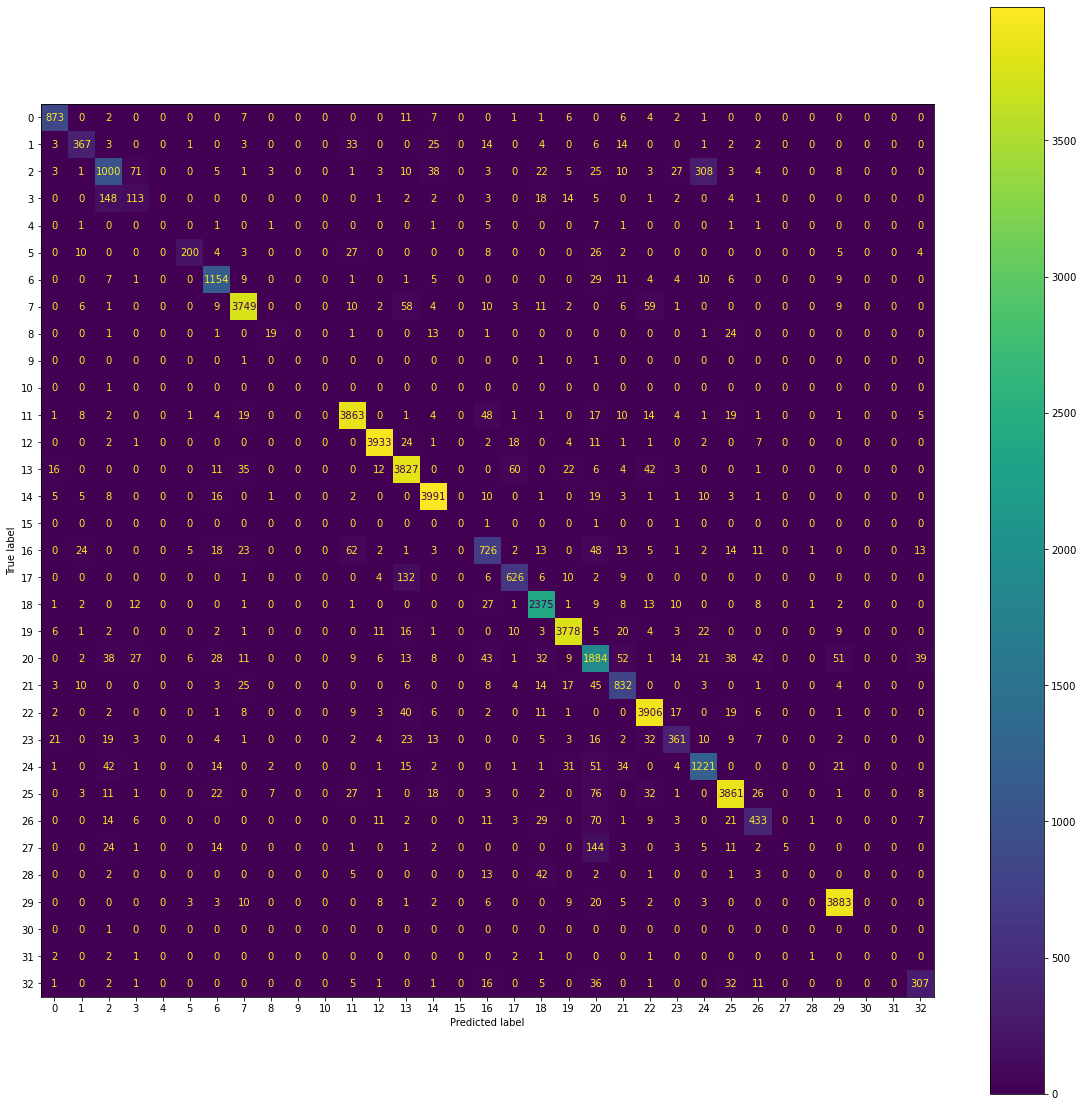

In [50]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.3 Linear Models

#### 6.3.1 Ridge Regression

In [51]:
from sklearn.linear_model import RidgeClassifier

rc_model = RidgeClassifier()
rc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

RidgeClassifier()

In [52]:
predictions = rc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [53]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.7605280909704153
F1-score: 0.3833381104492391


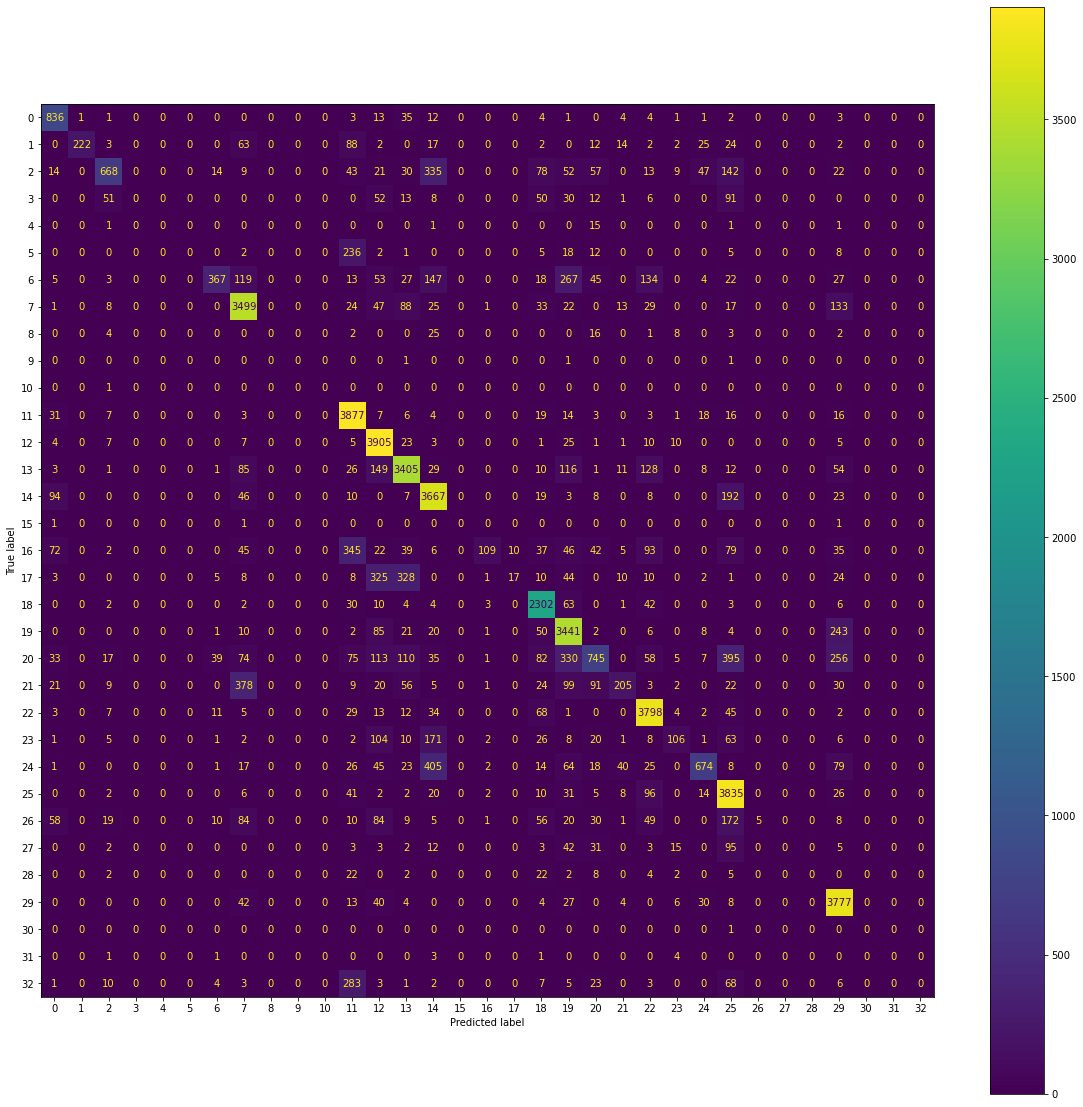

In [54]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.3.2 Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
predictions = lr_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [57]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.416266743760239
F1-score: 0.16624504037177612


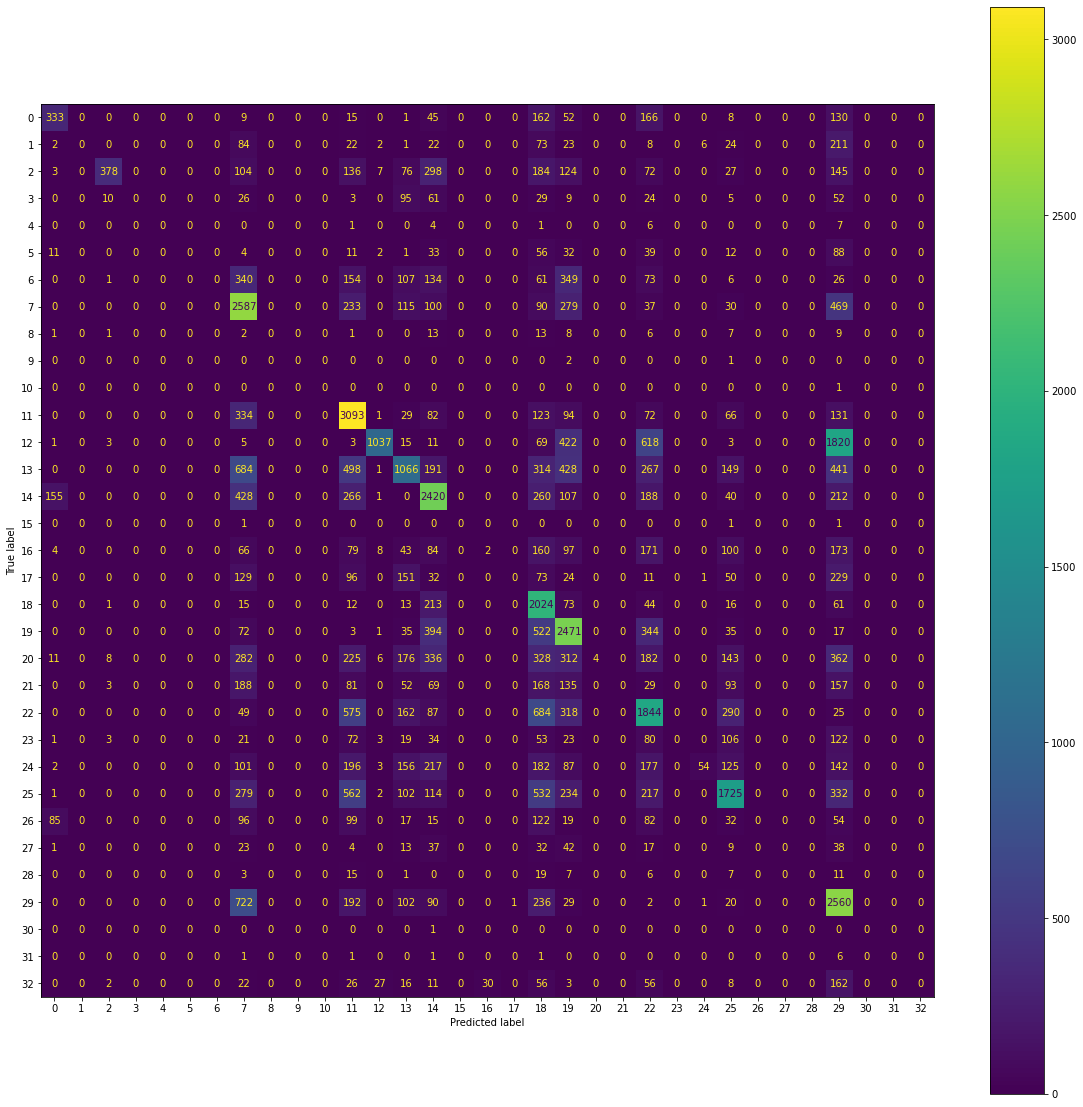

In [58]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.4 Ensembles

#### 6.4.1 Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

RandomForestClassifier(n_estimators=200)

In [60]:
predictions = rfc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [61]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.973576178086152
F1-score: 0.8068781667625144


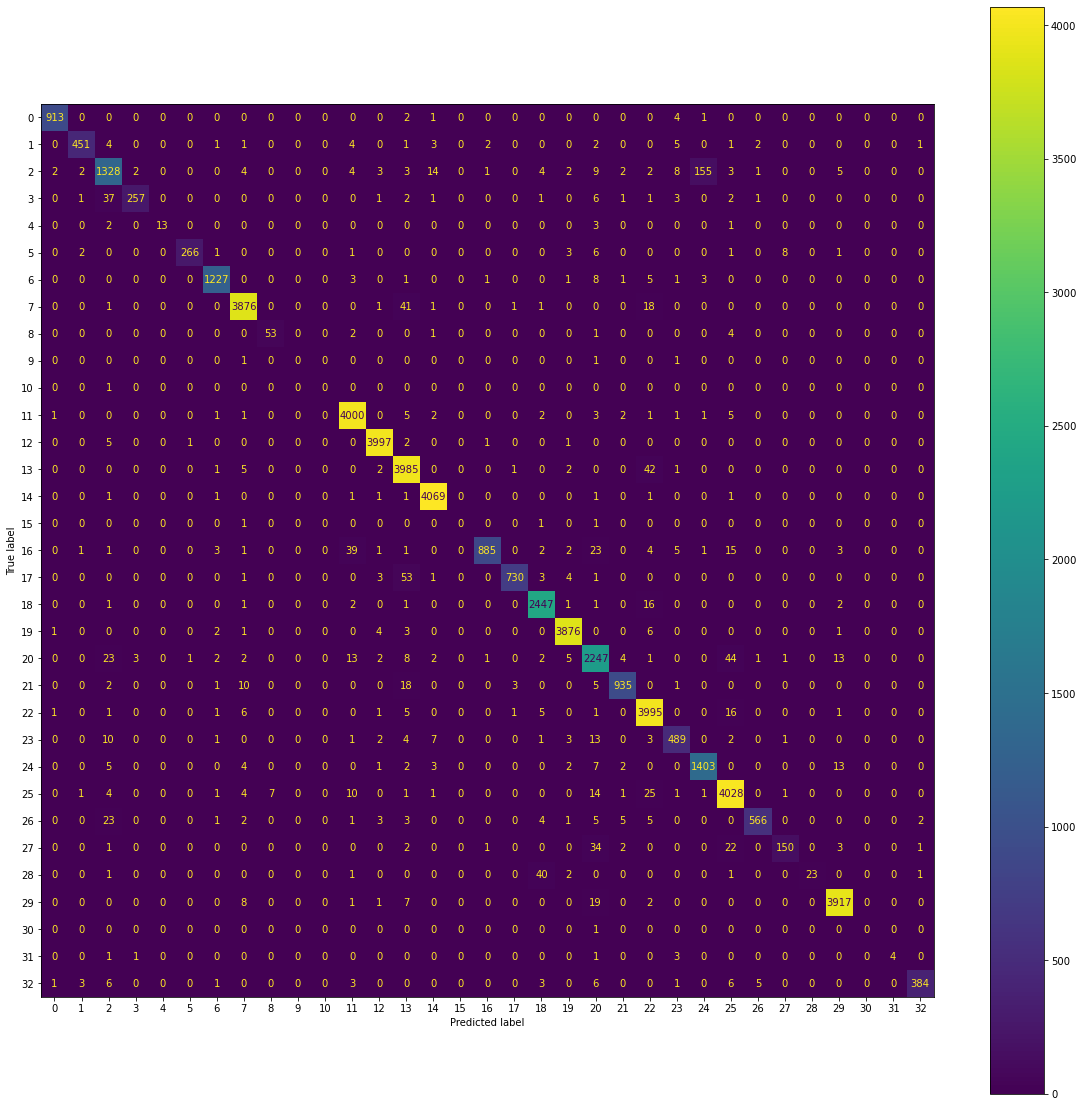

In [62]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.4.2 Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

GradientBoostingClassifier()

In [64]:
predictions = gbc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [65]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9461115929459382
F1-score: 0.7018580711626502


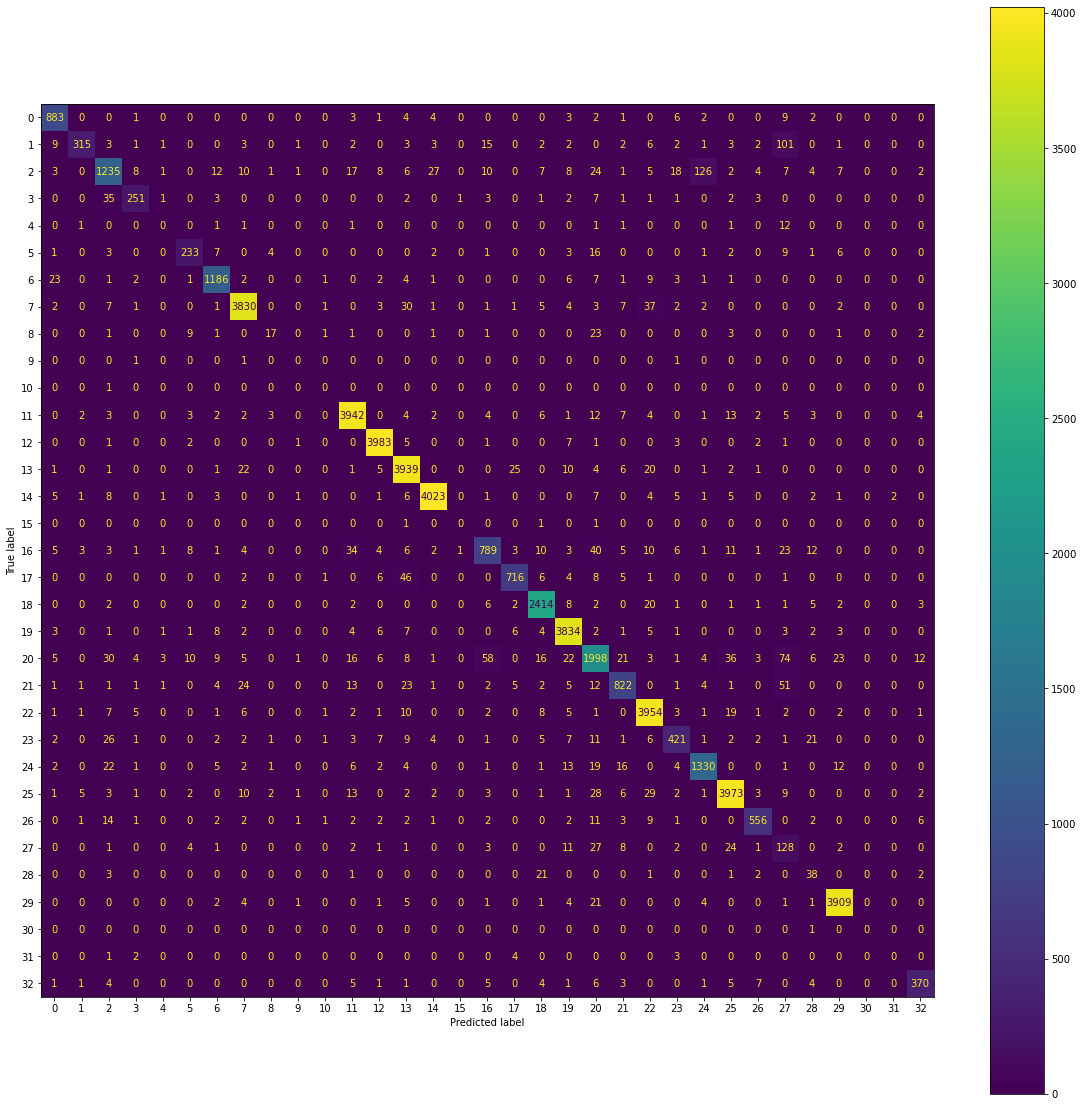

In [66]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.4.3 Gradient Boosting (Light GBM)

In [68]:
from lightgbm import LGBMClassifier

lgbmc_model = LGBMClassifier(n_estimators=200, learning_rate=0.01)
lgbmc_model.fit(train_df[customs_columns + comercial_columns + all_countries + months +usd_kg].values,
             train_df['Categoría macro Aurum'].values)

LGBMClassifier(learning_rate=0.01, n_estimators=200)

In [69]:
predictions = lgbmc_model.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [70]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

Accuracy: 0.9640165751180495
F1-score: 0.7970656950057835


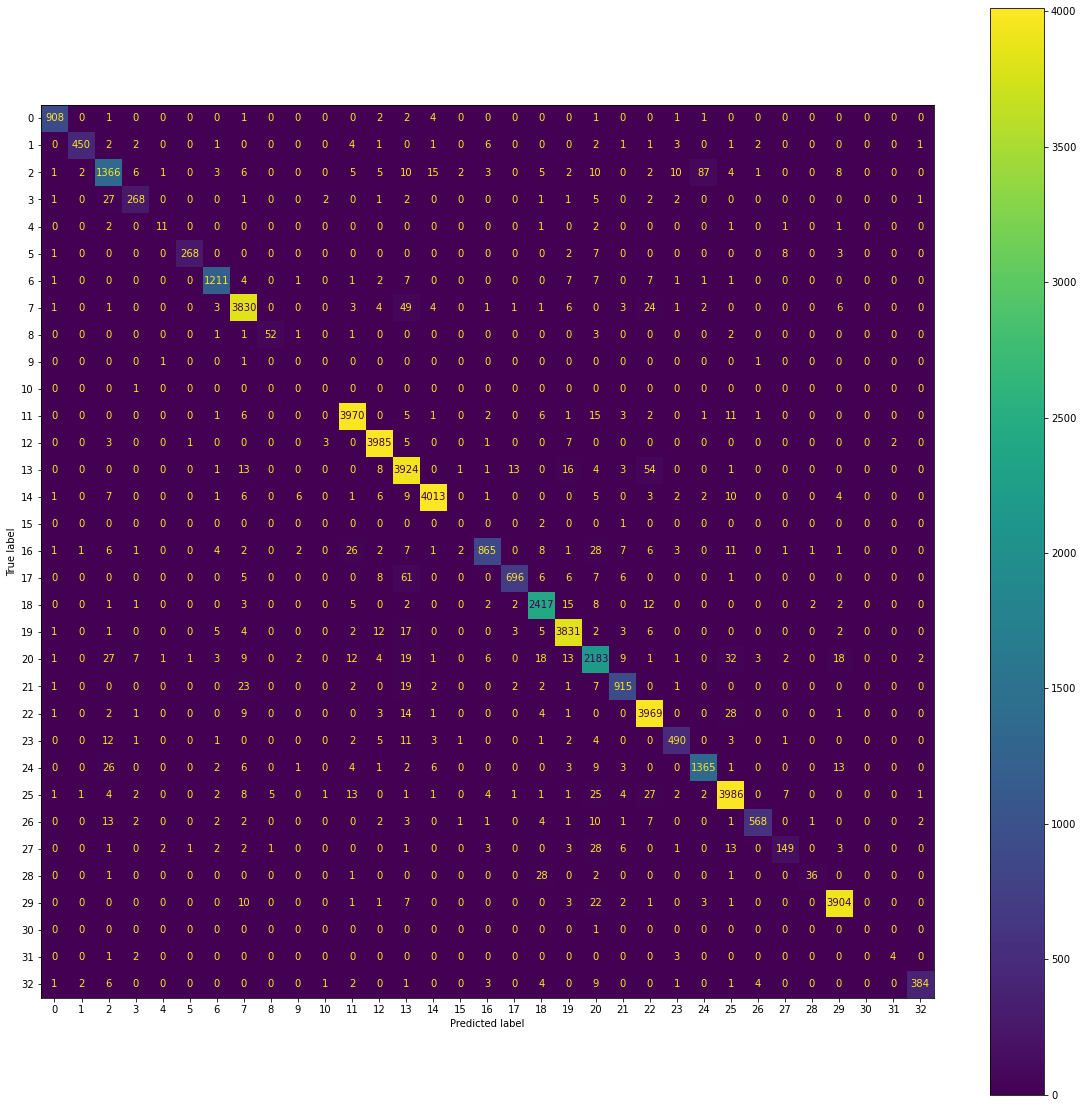

In [71]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

### 6.5 Best models parameter optimization

#### 6.5.1 Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[50, 100, 200], 'criterion':["gini", "entropy", "log_loss"], 'max_depth':[10, 50, None]}
rfc_model = RandomForestClassifier()

grid_rfc = GridSearchCV(rfc_model, parameters)
grid_rfc.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

c:\Users\spost\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
predictions = grid_rfc.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [ ]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

In [ ]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.5.2 Multi-Layer Perceptron

In [ ]:
parameters = {'hidden_layer_sizes':[(16, 8, 8), (8, 4)], 'alpha':[1e-3, 5e-4, 1e-4]}
mlp_model = MLPClassifier(solver='adam', random_state=1, max_iter=1000,
                         early_stopping=True, verbose=True)

grid_mlp = GridSearchCV(mlp_model, parameters)

grid_mlp.fit(train_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values,
             train_df['Categoría macro Aurum'].values)

In [ ]:
predictions = grid_mlp.predict(test_df[customs_columns + comercial_columns + all_countries + months + usd_kg].values)

In [ ]:
print(f"Accuracy: {accuracy_score(test_df['Categoría macro Aurum'].values, predictions)}")
print(f"F1-score: {f1_score(test_df['Categoría macro Aurum'].values, predictions, average='macro')}")

In [ ]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)